In [ ]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

In [ ]:
df

,course_name,duration
0,Data Science,2
1,Machine Learning,3
2,Big Data,6
3,Data Engineer,4


## Question 1

In [ ]:
df.loc[1]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

## Question 2

The loc[] and iloc[] functions are used to slice a Pandas DataFrame. The main difference between the two is that loc[] gets DataFrame rows and columns by labels/names, while iloc[] gets them by integer index/position.

In [ ]:
reindex = [3,0,1,2]
df = pd.DataFrame({"Data" : [10,20,30,40]})
df

,Data
0,10
1,20
2,30
3,40


In [ ]:
df = df.reindex(reindex)

In [ ]:
df

,Data
3,40
0,10
1,20
2,30


In [ ]:
print(df.loc[2])
print(df.iloc[2])

Data    30
Name: 2, dtype: int64
Data    20
Name: 1, dtype: int64


Here,loc is taking named/labeled index that's why it is getting output as 30 while iloc[] take the position indexes that's why output is 20

In [ ]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

In [ ]:
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.866305,0.761655,0.902680,0.445440,0.420401,0.506610
2,0.007890,0.784920,0.327412,0.854893,0.976069,0.565749
3,0.453309,0.597594,0.067324,0.209267,0.091058,0.483531
4,0.656206,0.636559,0.987862,0.311297,0.332178,0.645572
5,0.871453,0.768471,0.840733,0.677760,0.424792,0.209728
6,0.625685,0.879133,0.692057,0.977719,0.699646,0.027925


## Question 4

In [ ]:
df1.mean()

column_1    0.580141
column_2    0.738055
column_3    0.636344
column_4    0.579396
column_5    0.490691
column_6    0.406519
dtype: float64

In [ ]:
df1['column_2'].std()

0.10354922355334074

## Question 5

In [ ]:
df1.loc[2,"column_2"] = "gaurav"

In [ ]:
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.866305,0.761655,0.902680,0.445440,0.420401,0.506610
2,0.007890,gaurav,0.327412,0.854893,0.976069,0.565749
3,0.453309,0.597594,0.067324,0.209267,0.091058,0.483531
4,0.656206,0.636559,0.987862,0.311297,0.332178,0.645572
5,0.871453,0.768471,0.840733,0.677760,0.424792,0.209728
6,0.625685,0.879133,0.692057,0.977719,0.699646,0.027925


In [60]:
df1['column_2'].mean()

TypeError: ignored

The mean() is getting error because mean of a float and string datatype is not possiblle.

## Question 6

(used chat-gpt)

Window functions in Pandas are used to perform calculations across a set of rows that are interrelated with the current row. The window functions help us to perform aggregated calculations across various partitions or cross-sections of the data.

The window functions in Pandas can be broadly divided into three categories: Aggregate, Ranking, and Value. The Aggregate category of window functions can be of three types: Group, Rolling, and Expanding.

Here are the types of window functions:

* Rolling Window Functions
* Expanding Window Functions
*  Exponentially Weighted Window Functions
* Grouped Rolling Window Functions
* Grouped Expanding Window Functions
* Grouped Exponentially Weighted Window Functions

## Question 7

In [ ]:
import datetime

now = datetime.datetime.now()
print('Current month:', now.strftime('%B'))
print("Year : ",now.year )

Current month: July
Year :  2023


## Question 8

In [ ]:
date1 = input("Enter the first date (YYYY-MM-DD)")
date2 = input("Enter the second date (YYYY-MM-DD)")

delta = pd.to_datetime(date1) - pd.to_datetime(date2)

days = delta.days
hours = delta.seconds//3600
minute = (delta.seconds//60)%60
print(f"The difference betwwen {date1} and {date2} is {days} days, {hours} hours, {minute} minutes")

Enter the first date (YYYY-MM-DD)2023-06-01
Enter the second date (YYYY-MM-DD)2023-04-01
The difference betwwen 2023-06-01 and 2023-04-01 is 61 days, 0 hours, 0 minutes


## Question  9

In [ ]:
def convert_categorical(file_path,column_name,categorical_order):
  df = pd.read_csv(file_path)
  df[column_name] = pd.Categorical(df[column_name],categories = categorical_order,ordered = True)
  sorted_df = df.sort_values("Category")
  return sorted_df

In [ ]:
convert_categorical('/content/Q9.csv',"Category",["B","A","C"])

,ID,Category
1,2,B
4,5,B
0,1,A
3,4,A
5,6,A
2,3,C


## Question 10

In [ ]:
df = pd.read_csv('/content/sales_data.csv')

In [ ]:
df.head()

,Date,Product,Category,Sales
0,2022-01-01,Product A,Category 1,100
1,2022-01-01,Product B,Category 1,200
2,2022-01-01,Product C,Category 2,150
3,2022-01-02,Product A,Category 1,120
4,2022-01-02,Product B,Category 1,220


In [ ]:
df["Category"].unique()

array(['Category 1', 'Category 2'], dtype=object)

In [46]:
sale_df = df.groupby(["Date","Category"])["Sales"].sum().reset_index()
sale_df = sale_df.pivot_table(index = "Date",columns = "Category",values = "Sales").reset_index()

<Axes: >

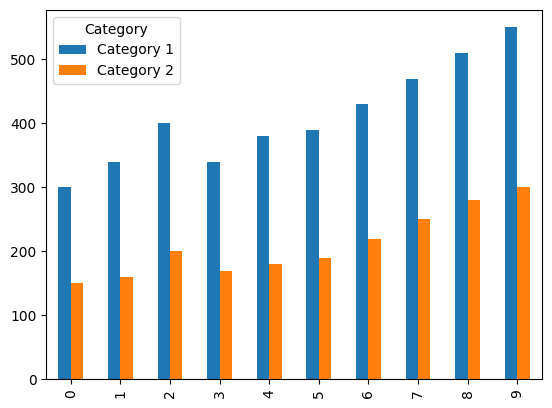

In [50]:
sale_df.plot.bar()

## Question 11

In [58]:
def test_stats(file_path):
  student_df = pd.read_csv(file_path)
  stat_dict = {}

  stat_dict["Mean"] = student_df["Test Score"].mean()
  stat_dict["Median"] = student_df["Test Score"].median()
  stat_dict["Mode"] = student_df["Test Score"].mode()

  test_stat = pd.DataFrame(stat_dict).T.reset_index().rename(columns = {"index":"Statistic" , 0 : "Values"})
  return test_stat

In [59]:
test_stats("/content/student_data.csv")

,Statistic,Values
0,Mean,83.5
1,Median,85.0
2,Mode,85.0
